# 朴素贝叶斯算法原理

# 贝叶斯公式

在所有的机器学习分类算法中，朴素贝叶斯和其他绝大多数的分类算法都不同。对于大多数的分类算法，比如决策树,KNN,逻辑回归，支持向量机等，他们都是判别方法，也就是直接学习出特征输出Y和特征X之间的关系，要么是决策函数Y=f(X),要么是条件分布P(Y|X)。

但是朴素贝叶斯却是生成方法，也就是直接找出特征输出Y和特征X的联合分布P(X,Y),然后用P(Y|X)=P(X,Y)/P(X)得出。

贝叶斯学派的思想可以概括为先验概率+数据=后验概率。也就是说我们在实际问题中需要得到的后验概率，可以通过先验概率和数据一起综合得到。

条件独立公式，如果X和Y相互独立，则有：

$$P(X,Y) =P(X)P(Y)$$

条件概率公式：

$$P(Y|X) = P(X|Y)P(Y)/P(X)$$

全概率公式

$$ P(X) = \sum\limits_{k}P(X|Y =Y_k)P(Y_k) 其中\sum\limits_{k}P(Y_k)=1$$

从上面的公式很容易得出贝叶斯公式：

$$P(Y_k|X) = \frac{P(X|Y_k)P(Y_k)}{\sum\limits_{k}P(X|Y =Y_k)P(Y_k)}$$

# 朴素贝叶斯模型

假如分类模型样本是：

$$(x_1^{(1)}, x_2^{(1)}, ...x_n^{(1)}, y_1), (x_1^{(2)}, x_2^{(2)}, ...x_n^{(2)},y_2), ... (x_1^{(m)}, x_2^{(m)}, ...x_n^{(m)}, y_m)$$

即有m个样本，每个样本有n个特征，特征输出有K个类别，定义为C1,C2,...,CK。

从样本我们可以学习得到朴素贝叶斯的先验分布P(Y=Ck)(k=1,2,...K)

学习到条件概率分布$P(X=x|Y=C_k) = P(X_1=x_1, X_2=x_2,...X_n=x_n|Y=C_k)$

用贝叶斯公式得到X和Y的联合分布P(X,Y)了。联合分布P(X,Y)定义为：

$$\begin{align} P(X,Y=C_k)  &= P(Y=C_k)P(X=x|Y=C_k) \\&= P(Y=C_k)P(X_1=x_1, X_2=x_2,...X_n=x_n|Y=C_k) \end{align}$$

从上面的式子可以看出P(Y=Ck)比较容易通过最大似然法求出，得到的P(Y=Ck)就是类别Ck在训练集里面出现的频数。

但是条件概率分布却很难求出,这是一个超级复杂的有n个维度的条件分布。朴素贝叶斯模型在这里做了一个大胆的假设，即X的n个维度之间相互独立，这样就可以得出:

$$P(X_1=x_1, X_2=x_2,...X_n=x_n|Y=C_k) = P(X_1=x_1|Y=C_k)P(X_2=x_2|Y=C_k)...P(X_n=x_n|Y=C_k)$$

从上式可以看出，这个很难的条件分布大大的简化了，但是这也可能带来预测的不准确性。

如果特征之间真是非常不独立的话，那就尽量不要使用朴素贝叶斯模型了，考虑使用其他的分类方法比较好。

但是一般情况下，样本的特征之间独立这个条件的确是弱成立的，尤其是数据量非常大的时候。虽然我们牺牲了准确性，但是得到的好处是模型的条件分布的计算大大简化了，这就是贝叶斯模型的选择。

# 朴素贝叶斯的推断过程

既然是贝叶斯模型，当然是后验概率最大化来判断分类了。我们只要计算出所有的K个条件概率P(Y=Ck|X=X(test)),然后找出最大的条件概率对应的类别，这就是朴素贝叶斯的预测了。

我们预测的类别Cresult是使P(Y=Ck|X=X(test))最大化的类别，数学表达式为：

$$\begin{align} C_{result}  & = \underbrace{argmax}_{C_k}P(Y=C_k|X=X^{(test)}) \\& = \underbrace{argmax}_{C_k}P(X=X^{(test)}|Y=C_k)P(Y=C_k) \Bigg{/}P(X=X^{(test)}) \end{align}$$

由于对于所有的类别计算P(Y=Ck|X=X(test))时，上式的分母是一样的，都是P(X=X(test)，因此，我们的预测公式可以简化为：

$$C_{result}  = \underbrace{argmax}_{C_k}P(X=X^{(test)}|Y=C_k)P(Y=C_k)$$

接着我们利用朴素贝叶斯的独立性假设，就可以得到通常意义上的朴素贝叶斯推断公式:

$$C_{result}  = \underbrace{argmax}_{C_k}P(Y=C_k)\prod_{j=1}^{n}P(X_j=X_j^{(test)}|Y=C_k)$$

# 朴素贝叶斯的参数估计

对于P(Y=Ck),比较简单，通过极大似然估计我们很容易得到P(Y=Ck)为样本类别Ck出现的频率，即样本类别Ck出现的次数mk除以样本总数m。

对于P(Xj=X(test)j|Y=Ck)(j=1,2,...n),这个取决于我们的先验条件：

a) 如果我们的Xj是离散的值，那么我们可以假设Xj符合多项式分布，这样得到P(Xj=X(test)j|Y=Ck) 是在样本类别Ck中，特征X(test)j出现的频率。即：

$$P(X_j=X_j^{(test)}|Y=C_k) = \frac{m_{kj^{test}}}{m_k}$$

其中mk为样本类别Ck总的特征计数，而mkjtest为类别为Ck的样本中，第j维特征X(test)j出现的计数。

某些时候，可能某些类别在样本中没有出现，这样可能导致P(Xj=X(test)j|Y=Ck)为0，这样会影响后验的估计，为了解决这种情况，我们引入了拉普拉斯平滑，即此时有：

$$P(X_j=X_j^{(test)}|Y=C_k) = \frac{m_{kj^{test}} + \lambda}{m_k + O_j\lambda}$$

其中λ 为一个大于0的常数，常常取为1。Oj为第j个特征的取值个数。

如果我们我们的Xj是非常稀疏的离散值，即各个特征出现概率很低，这时我们可以假设Xj符合伯努利分布，即特征Xj出现记为1，不出现记为0。

$$P(X_j=X_j^{(test)}|Y=C_k) = P(X_j|Y=C_k)X_j^{(test)} + (1 - P(X_j|Y=C_k))(1-X_j^{(test)})$$

其中，X(test)j取值为0和1。

c)如果我们我们的Xj是连续值，我们通常取Xj的先验概率为正态分布，即在样本类别Ck中，Xj的值符合正态分布。这样P(Xj=X(test)j|Y=Ck)的概率分布是：

$$P(X_j=X_j^{(test)}|Y=C_k) = \frac{1}{\sqrt{2\pi\sigma_k^2}}exp\Bigg{(}-\frac{(X_j^{(test)} - \mu_k)^2}{2\sigma_k^2}\Bigg{)}$$

其中μk和σ2k是正态分布的期望和方差，可以通过极大似然估计求得。μk为在样本类别Ck中，所有Xj的平均值。σ2k为在样本类别Ck中，所有Xj的方差。对于一个连续的样本值，带入正态分布的公式，就可以求出概率分布了。

In [1]:
#coding=utf-8

'''
新闻分类
'''

import os
import jieba
from sklearn.datasets.base import Bunch
import pickle

from sklearn.feature_extraction.text import TfidfVectorizer#feature_extraction‘特征提取’,Convert a collection of raw documents to a matrix of TF-IDF features.
'''
The sklearn.feature_extraction module deals with feature extraction from raw data. 
It currently includes methods to extract features from text and images.
The sklearn.feature_extraction.text submodule gathers utilities to build feature vectors from text documents.
'''
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB #朴素贝叶斯分类算法，Naive Bayes classifier for multinomial models
'''
The multinomial Naive Bayes classifier is suitable for classification with discrete features
 (e.g., word counts for text classification). The multinomial distribution normally requires integer feature counts.
  However, in practice, fractional counts such as tf-idf may also work.
'''
from sklearn.metrics import classification_report#metrics度量，分类报告Build a text report showing the main classification metrics

In [2]:
text_train_cnews='F:\cnews\cnews.train.txt'
text_val_cnews='F:\cnews\cnews.val.txt'
text_test_cnews='F:\cnews\cnews.test.txt'
text_category_cnews='F:\cnews\cnews.category.txt'

In [3]:
word_level='F:\cnews\word_level'
text_jieba_cnews='F:\cnews\cnews.jieba.txt'
text_cnews='F:\cnews\cnews.word.jieba.dat'

#创建文件夹，用来存放处理后的数据
if not os.path.exists(word_level):
    os.mkdir(word_level)

In [4]:
class Categories:
    def __init__(self,filename):#初始化
        self.category={}#将类别名和类别数值存储在字典里面
        for line in open(filename,'r',encoding='utf-8'):
            c,label=line.strip('\r\n').split('\t')#体育 0；财经 1；房产 2；
            print(c,label)
            self.category[c]=label
    #根据类别名获取类别的数值
    def get_category_label(self,name):
        print(name)
        return self.category[name]
categories=Categories(text_category_cnews)
print(categories.get_category_label("体育"))

﻿默认 -1
体育 0
财经 1
房产 2
家居 3
教育 4
科技 5
时尚 6
时政 7
游戏 8
娱乐 9
体育
0


In [5]:
def get_word(filenamelist,save_filename):#把所有的数据全部读取，并且输出存到同一个文本文件内
    labels=[]
    count=0
    for filename in filenamelist:
        count+=1
        print('*****正在拆分第%s个输入文本的信息，请稍等*******'%count)
        with open(filename,'r',encoding='utf-8') as f:
            lines=f.readlines()#一开始写成了readline，然后找了半天都没有找出来哪里报错了，fuck！！！！！
        with open(save_filename,'a',encoding='utf-8') as f1:#用w的方式，每读取一个文件，输出的文本会将之前的数据覆盖了，用a的话就不会，追加
            for line in lines:
                label,content=line.strip('\r\n').split('\t')
                labels.append(label)
                content_list=list(jieba.cut(content))#jieba分词
                content_word=''
                #将list里面的元素（词），用‘’拼接成字符串
                for word in content_list:
                    word=word.strip()
                    if word !='':#不等于空的数值，进行存储
                        content_word +=word+' '#使用空格进行区分
                wordli='%s\t%s\n'%(label,content_word.strip())#存储分词后的新闻内容
                f1.write(wordli)
        print(set(labels))#打印出labels中不重复的键值

filenamelist=[text_val_cnews,text_test_cnews,text_train_cnews]
get_word(filenamelist,text_jieba_cnews)

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\16248\AppData\Local\Temp\jieba.cache


*****正在拆分第1个输入文本的信息，请稍等*******


Loading model cost 0.665 seconds.
Prefix dict has been built succesfully.


{'家居', '财经', '体育', '游戏', '房产', '时尚', '教育', '时政', '科技', '娱乐'}
*****正在拆分第2个输入文本的信息，请稍等*******
{'家居', '财经', '体育', '游戏', '房产', '时尚', '教育', '时政', '科技', '娱乐'}
*****正在拆分第3个输入文本的信息，请稍等*******
{'家居', '财经', '体育', '游戏', '房产', '时尚', '教育', '时政', '科技', '娱乐'}


In [6]:
def save_bunch(input_file_name,out_file_name,category_file):#将输入的文本文件进行分词拆分、然后分类
    categories=Categories(category_file)
    #实例化Bunch对象,包含targets、filenames、labels
    #contents
    bunch=Bunch(targets=[],filenames=[],labels=[],contents=[])
    filename=0
    lab=[]
    print('***********正在调用save_bunch函数,请稍等**********')
    with open(input_file_name,'r',encoding='utf-8') as f:
        lines=f.readlines()
    for line in lines:
        filename +=1
        category,content=line.strip('\r\n').split('\t')#由于get_word 函数中最后的wordli又通过\t和\n将分类和对应的新闻又组合在了一起
        bunch.contents.append(content)
        label=categories.get_category_label(category)#label的取值为0到9，代表体育、财经、房产。。。。。
        bunch.labels.append(label)
        bunch.filenames.append(str(filename))
        lab.append(label)
    bunch.targets=list(set(lab))#targets存的是大的分类，而labels是下属的每条新闻都对应一个分类，而这个label是和大的分类一致的。

    #print(bunch) #{'targets': ['0'], 'filenames': ['1', '2', '3', '4', '5', '6'], 'labels': ['0', '0', '0', '0', '0', '0'], 'contents': ['黄蜂 vs 湖人 首发 ： 科比 带伤 战

    with open(out_file_name,'wb') as f:#将bunch存储到文件
        pickle.dump(bunch,f)
#
save_bunch(text_jieba_cnews,text_cnews,text_category_cnews)
text_tfdif_cnews='F:\cnews\cnews.word.tfdif.jieba.dat'


﻿默认 -1
体育 0
财经 1
房产 2
家居 3
教育 4
科技 5
时尚 6
时政 7
游戏 8
娱乐 9
***********正在调用save_bunch函数,请稍等**********
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体

游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科

家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家

时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时

财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财

体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体

娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱

家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家

房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房

教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教

时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时

时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时

时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游

游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科

科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科

财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财

时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时

家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房

游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游

体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体

娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱

家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家

房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房

教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教

时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时

时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时

游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游

科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科

财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财

财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体

房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教

娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家

时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游

体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体

娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱

家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家

房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房

教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教

时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时

时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时

时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游

游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游

科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科

财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财

房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教

娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱

时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时

体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体

体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体

娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱

家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家

房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房

教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教

时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时

时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时

游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游

科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科

科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科

财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财

科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财

教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教

财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财

体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体育
体

娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱乐
娱

家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家居
家

房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房产
房

教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教育
教

时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时尚
时

时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时政
时

游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游戏
游

科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科技
科

财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财经
财

In [7]:
stop_word_file='F:/stopwords-master/中文停用词表.txt'
def _read_bunch(filename):
    with open(filename,'rb') as f:
        bunch=pickle.load(f)
    return bunch

def _write_bunch(bunch,filename):
    with open(filename,'wb') as f:
        pickle.dump(bunch,f)

def get_stop_words(filename=stop_word_file):
    stop_word=[]
    for line in open(filename,'r',encoding='utf-8'):
        stop_word.append(line.strip())
    return stop_word

In [8]:

def tfidf_deal_cnews(input_file_name,out_file_name):
    bunch=_read_bunch(input_file_name)#读取数据
    stop_words=get_stop_words()#得到停用词
    #实例化bunch对象
    #tmd（权重列表）
    #vocabulary（词典索引）
    space_bunch=Bunch(targets=bunch.targets,filename=bunch.filenames,labels=bunch.labels,tmd=[],vocabulary={})
    #使用特征提取函数TfidfVectorizer初始化向量空间模型
    vector=TfidfVectorizer(stop_words=stop_words,sublinear_tf=True,max_df=0.5)#提取函数的初始化，啥数据都没有处理。选择能代表新闻特征、独一无二的词汇，词频大于50%的就被过滤掉？？？如果过大、过小会如何？
    space_bunch.tmd=vector.fit_transform(bunch.contents)#contents只有新闻内容，没有分类。用df-idf训练转化，获得if-idf权值矩阵：fit_transform(raw_documents[, y])	Learn vocabulary and idf, return term-document matrix.
    '''
    print(space_bunch.tmd)输出格式为以下:
    (0, 834)	0.2608786231499419
    (0, 38)	0.2104752305319886
    (0, 557)	0.29664039933480035
    (0, 820)	0.2104752305319886
    '''
    space_bunch.vocabulary=vector.vocabulary_#词典索引，统计词频
    '''
    print(space_bunch.vocabulary)输出格式如下：
    {'黄蜂': 834, 'vs': 38, '湖人': 557, '首发': 820, '科比': 609, '带伤': 352, '保罗': 156,
    '''
    _write_bunch(space_bunch,out_file_name)#写入文件


tfidf_deal_cnews(text_cnews,text_tfdif_cnews)
bunch=_read_bunch(text_tfdif_cnews)

In [9]:
#构建分类器
x_train,x_test,y_train,y_test=train_test_split(bunch.tmd,bunch.labels,test_size=0.2,random_state=100)

In [10]:
nb=MultinomialNB(alpha=0.01)#实例化模型 alpha: Additive (Laplace/Lidstone) smoothing parameter (0 for no smoothing).
nb.fit(x_train,y_train)#训练模型	Fit Naive Bayes classifier according to X, y
y_pred=nb.predict(x_test)#预测测试集X; Perform classification(分类) on an array of test vectors X.
print(classification_report(y_test,y_pred))#打印输出评分

             precision    recall  f1-score   support

          0       1.00      1.00      1.00      6563
          1       0.98      0.98      0.98      6531
          2       0.97      0.97      0.97      6577
          3       0.99      0.98      0.98      6632
          4       0.99      0.98      0.98      6508
          5       0.99      0.99      0.99      6511
          6       0.99      0.99      0.99      6558
          7       0.98      0.98      0.98      6505
          8       1.00      1.00      1.00      6420
          9       0.98      1.00      0.99      6671

avg / total       0.99      0.99      0.99     65476



# SVM的原理

详情见思维导图

# 基于SVM的文本分类过程

SVM 文本分类算法主要分四个步骤：文本特征提取、文本特征表示、归一化处理和文本分类

# 文本特征提取

目前，在对文本特征进行提取时，常采用特征独立性假设来简化特征选择的过程，达到计算时间和计算质量之间的折中。一般的方法是根据文本中词汇的特征向量，通过设置特征阀值的办法选择最佳特征作为文本特征子集，建立特征模型。（特征提取前，先分词，去停用词）。

本特征提取有很多方法，其中最常用的方法是通过词频选择特征。先通过词频计算出权重，按权重从大到小排序，然后剔除无用词，这些词通常是与主题无关的，任何类的文章中都有可能大量出现的，比如“的”“是”“在”一类的词，一般在停词表中已定义好，去除这些词以后，有一个新的序列排下来，然后可以按照实际需求选取权重最高的前8个，10个或者更多词汇来代表该文本的核心内容。 

综上所述，特征项的提取步骤可以总结为：
        （1）对全部训练文档进行分词，由这些词作为向量的维数来表示文本；
        
         （2）统计每一类内文档所有出现的词语及其频率，然后过滤，剔除停用词和单字词；
         
        （3）统计每一类内出现词语的总词频，并取其中的若干个频率最高的词汇作为这一类别的特征词集；
        
        （4）去除每一类别中都出现的词，合并所有类别的特征词集，形成总特征词集。最后所得到的特征词集就是我们用到的特征集合，再用该集合去筛选测试集中的特征。

# 文本特征表示

# 归一化处理

归一化就是要把需要处理的数据经过处理后（通过某种算法）限制在你需要的一定范围内。

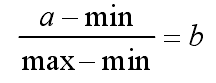

公式中a为关键词的词频，min为该词在所有文本中的最小词频，max为该词在所有文本中的最大词频。这一步就是归一化，当用词频进行比较时，容易发生较大的偏差，归一化能使文本分类更加精确。

# 文本分类

经过文本预处理、特征提取、特征表示、归一化处理后，已经把原来的文本信息抽象成一个向量化的样本集，然后把此样本集与训练好的模板文件进行相似度计算，若不属于该类别，则与其他类别的模板文件进行计算，直到分进相应的类别，这就是SVM 模型的文本分类方式。

In [ ]:
from sklearn.svm import SVC   
svclf = SVC(kernel = 'linear') 
svclf.fit(x_train,y_train)  
preds = svclf.predict(x_test);  
num = 0
preds = preds.tolist()
print(classification_report(y_test,preds))

# pLSA、共轭先验分布；LDA主题模型原理

## 基本原理

LSA（Latent semantic analysis，隐性语义分析）、pLSA（Probabilistic latent semantic analysis，概率隐性语义分析）和 LDA（Latent Dirichlet allocation，隐狄利克雷分配）这三种模型都可以归类到话题模型（Topic model，或称为主题模型）中。相对于比较简单的向量空间模型，主题模型通过引入主题这个概念，更进一步地对文本进行语义层面上的理解。

## LSA

LSA 模型就是对词-文档共现矩阵进行SVD，从而得到词和文档映射到抽象出的topic上的向量表示。LSA 通过将词映射到topic上得到distributional representation（词的分布表示），进而缓解文档检索、文档相似度计算等任务中所面临的同义词（多词一义）问题：比如我搜索“Java 讲义”，如果系统只是用字符匹配来检索的话，是不会返回一篇出现了“Java 课件”但通篇没出现“讲义”这个词的文档的。所以说，单纯地从词-文档共现矩阵取出词向量表示和文档向量表示的向量空间模型，尽管利用了大规模文档集的统计信息，仍然是无法直接从“语义”这个层面上去理解文本的。但是 LSA 这种将词映射到topic上的向量表示，很难去应对一词多义问题：比如“Java”这个词既可能指编程语言，也可能指爪哇岛，即使这两种含义的“Java”都在文档集里出现过，得到的 LSA 模型也无法很好地区分。

## pLSA

pLSA 模型是有向图模型，将主题作为隐变量，构建了一个简单的贝叶斯网，采用EM算法估计模型参数。相比于 LSA 略显“随意”的SVD，pLSA 的统计基础更为牢固。

比于 LDA 模型里涉及先验分布，pLSA 模型相对简单：观测变量为文档 $d_m∈D$（文档集共 M 篇文档）、词 $w_n∈W$（设词汇表共有 V 个互不相同的词），隐变量为主题 $z_k∈Z$（共 K 个主题）。在给定文档集后，我们可以得到一个词-文档共现矩阵，每个元素$ n(d_m,w_n) $表示的是词$ w_n$在文档$ d_m$中的词频。也就是说，pLSA 模型也是基于词-文档共现矩阵的，不考虑词序

pLSA 模型通过以下过程来生成文档（记号里全部省去了对参数的依赖）：

(1) 以概率 $P(d_m)$选择一篇文档 $d_m	$
 
(2) 以概率$ P(z_k∣d_m) $得到一个主题$ z_k $

(3) 以概率 $P(w_n∣z_k)$ 生成一个词 w_n

概率图模型如下所示

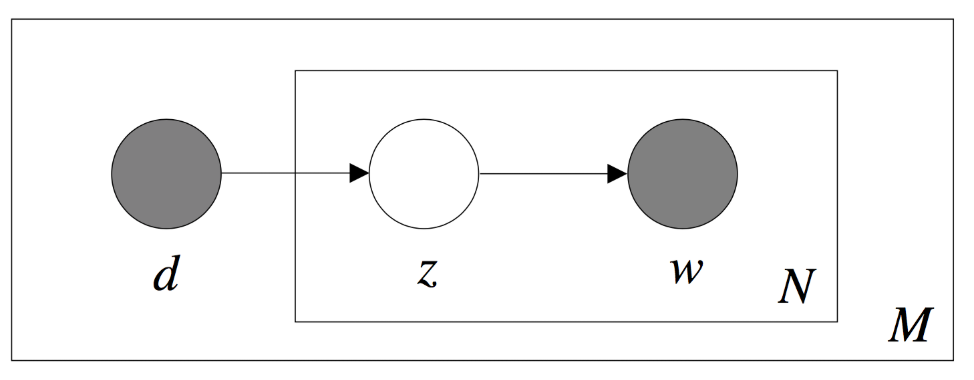

图里面的浅色节点代表不可观测的隐变量，方框是指变量重复（plate notation），内部方框表示的是文档$ d_m$的长度是 N，外部方框表示的是文档集共 M 篇文档。pLSA 模型的参数$ θ$ 显而易见就是：K×M个$ P(z_k∣d_m)$、$V×K $个$ P(w_n∣z_k)$ 。$P(z_k∣d_m)$表征的是给定文档在各个主题下的分布情况，文档在全部主题上服从多项式分布（共 M 个）；$P(w_n∣z_k)$ 则表征给定主题的词语分布情况，主题在全部词语上服从多项式分布（共 K 个）。

这个贝叶斯网表达的是如下的联合分布：

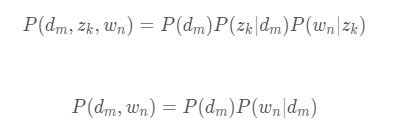

假设有一篇文档为 $w⃗ =(w1,w2,...,wN)$  ，生成它的概率就是

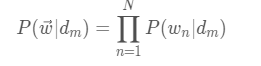

如果不考虑随机变量之间的条件独立性的话，有

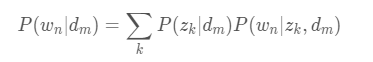

但是观察图模型中的 d 、z 、w 可以知道，它们三个是有向图模型里非常典型的 head-to-tail 的情况：当 z 已知时，d 和 w 条件独立，也就是

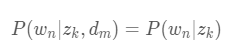

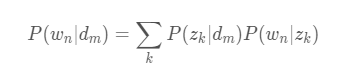

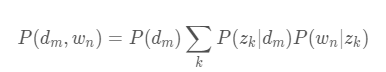

考虑最大化对数似然函数：

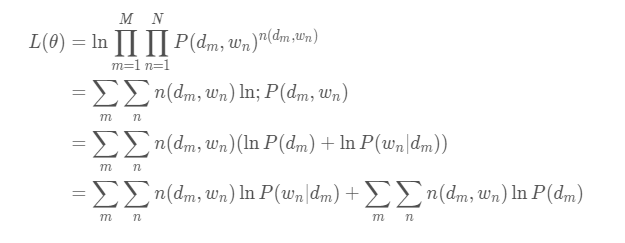

第二项可以直接去掉，那么不妨直接记：

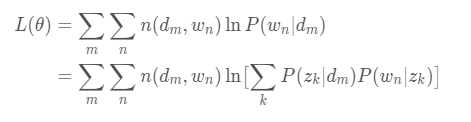

参数估计：EM算法迭代求解

## 共轭先验分布

设θ是总体分布中的参数(或参数向量)，π(θ)是θ的先验密度函数，假如由抽样信息算得的后验密度函数与π(θ)有相同的函数形式，则称π(θ)是θ的(自然)共轭先验分布。

在贝叶斯统计中，如果后验分布与先验分布属于同类，则先验分布与后验分布被称为共轭分布，而先验分布被称为似然函数的共轭先验。比如，高斯分布家族在高斯似然函数下与其自身共轭 (自共轭)。

具体地说，就是给定贝叶斯公式 ${\displaystyle p(\theta |x)={\frac {p(x|\theta )p(\theta )}{\int p(x|\theta ')p(\theta ')d\theta '}},}  假定似然函数  {\displaystyle p(x|\theta )}$ 是已知的，问题就是选取什么样的先验分布$ {\displaystyle p(\theta )} $会让后验分布与先验分布具有相同的数学形式。

共轭先验的好处主要在于代数上的方便性，可以直接给出后验分布的封闭形式，否则的话只能数值计算。共轭先验也有助于获得关于似然函数如何更新先验分布的直观印象。

所有指数家族的分布都有共轭先验。 

## LDA

LDA（Latent Dirichlet Allocation）是一种文档主题生成模型，也称为一个三层贝叶斯概率模型，包含词、主题和文档三层结构。所谓生成模型，就是说，我们认为一篇文章的每个词都是通过“以一定概率选择了某个主题，并从这个主题中以一定概率选择某个词语”这样一个过程得到。文档到主题服从多项式分布，主题到词服从多项式分布。

LDA是一种非监督机器学习技术，可以用来识别大规模文档集（document collection）或语料库（corpus）中潜藏的主题信息。它采用了词袋（bag of words）的方法，这种方法将每一篇文档视为一个词频向量，从而将文本信息转化为了易于建模的数字信息。但是词袋方法没有考虑词与词之间的顺序，这简化了问题的复杂性，同时也为模型的改进提供了契机。每一篇文档代表了一些主题所构成的一个概率分布，而每一个主题又代表了很多单词所构成的一个概率分布。


## LDA生成过程

对于语料库中的每篇文档，LDA定义了如下生成过程（generativeprocess）：  

(1)对每一篇文档，从主题分布中抽取一个主题;

(2)从上述被抽到的主题所对应的单词分布中抽取一个单词;

(3)重复上述过程直至遍历文档中的每一个单词。  

 语料库中的每一篇文档与T（通过反复试验等方法事先给定）个主题的一个多项分布 （multinomialdistribution）相对应，将该多项分布记为θ。每个主题又与词汇表（vocabulary）中的V个单词的一个多项分布相对应，将这个多项分布记为φ。


In [11]:
from scipy.sparse import hstack
def tf_LDA_deal_cnews(input_file_name,out_file_name):
    bunch=_read_bunch(input_file_name)#读取数据
    stop_words=get_stop_words()#得到停用词
    #实例化bunch对象
    #tmd（权重列表）
    #vocabulary（词典索引）
    space_bunch=Bunch(targets=bunch.targets,filename=bunch.filenames,labels=bunch.labels,tmd=[],vocabulary={})
    #使用特征提取函数TfidfVectorizer初始化向量空间模型
    tf_vector=TfidfVectorizer(stop_words=stop_words,sublinear_tf=True,max_df=0.5,max_features=10000)#提取函数的初始化，啥数据都没有处理。选择能代表新闻特征、独一无二的词汇，词频大于50%的就被过滤掉？？？如果过大、过小会如何？
    
    tf_features=tf_vector.fit_transform(bunch.contents)
    ## lda
    lda = LatentDirichletAllocation(n_topics=10, max_iter=5,
                                learning_method='online',
                                learning_offset=50.,
                                random_state=0)
    cnt_vector =CountVectorizer(stop_words=stop_words,max_df=0.5,max_features=10000)
    cntTf = cnt_vector.fit_transform(bunch.contents)
    LDA_features = lda.fit_transform(cntTf)
    
    
    
    print(tf_features.shape)
    print(LDA_features.shape)
    space_bunch.tmd= hstack((tf_features,LDA_features))
    print(space_bunch.tmd.shape)
    space_bunch.vocabulary=tf_vector.vocabulary_#词典索引，统计词频
    '''
    print(space_bunch.vocabulary)输出格式如下：
    {'黄蜂': 834, 'vs': 38, '湖人': 557, '首发': 820, '科比': 609, '带伤': 352, '保罗': 156,
    '''
    _write_bunch(space_bunch,out_file_name)#写入文件